In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [3]:
dataset


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [4]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
dataset = dataset.dropna()

In [6]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
X=dataset.drop('MPG',axis=1)
X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [8]:
y = dataset['MPG']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: MPG, dtype: float64

In [9]:
X = X.to_numpy()

In [10]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [11]:
X.shape

(392, 7, 1)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [13]:
n_steps = X.shape[1]
n_steps

7

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam

In [21]:
def build_model(): 
    model = models.Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='linear'))  # 선형 활성화 함수를 사용한 출력층
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.01), metrics=['mse'])  # MSE 손실 함수
    
    return model

model = build_model() 
print("input_shape => ", n_steps, n_features)
model.summary()

input_shape =>  7 1
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             192       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                9650      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 9,893
Trainable params: 9,893
Non-trainable params: 0
________________________________

In [22]:
import tensorflow as tf
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs=N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 27ms/step - loss: 15463.2686 - mse: 15463.2686 - val_loss: 4549.0396 - val_mse: 4549.0396
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 2874.2166 - mse: 2874.2166 - val_loss: 2066.3052 - val_mse: 2066.3052
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 1137.2910 - mse: 1137.2910 - val_loss: 900.0733 - val_mse: 900.0733
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 528.6750 - mse: 528.6750 - val_loss: 445.7709 - val_mse: 445.7709
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 309.3977 - mse: 309.3977 - val_loss: 202.4278 - val_mse: 202.4278
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 188.5507 - mse: 188.5507 - val_loss: 149.8441 - val_mse: 149.8441
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 152.4413 - mse: 152.4413 - val_loss: 133.7542 - val_mse: 133.7542
Epoch 8/100
10

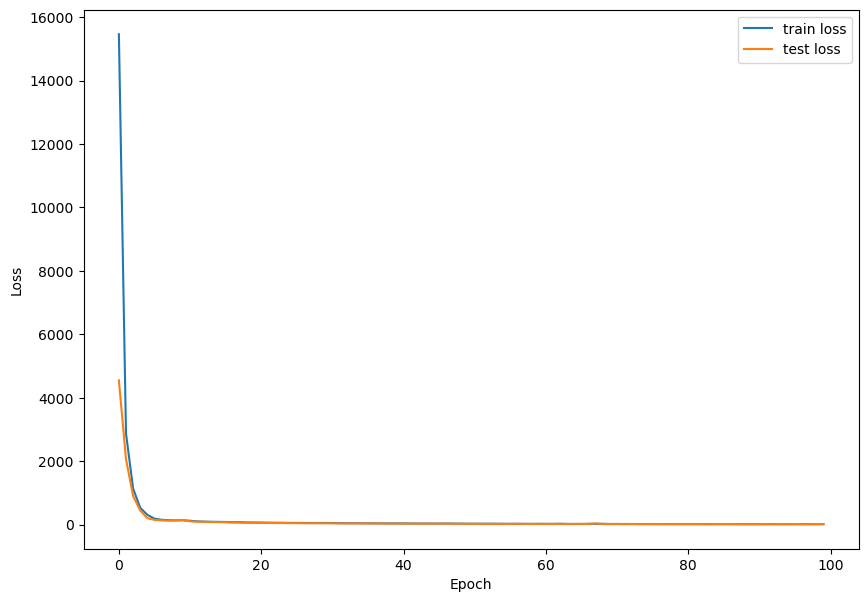

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()